<a href="https://colab.research.google.com/github/ayanoglu/MultiClass-Classification-Problem/blob/main/MultiClass_Classification_Problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import pandas as pd
import keras
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from keras import regularizers
from tensorflow.keras.optimizers import SGD
from matplotlib import pyplot
import matplotlib.pyplot as plt
from google.colab import files
uploaded = files.upload()

Saving Image_Segmentation.csv to Image_Segmentation (1).csv


In [21]:
import io
datasetDF = pd.read_csv(io.BytesIO(uploaded['Image_Segmentation.csv']))
FDS = pd.DataFrame.to_numpy(datasetDF)
FDS[0:2,:]

array([[ 2.1800000e+02,  1.7800000e+02,  9.0000000e+00,  1.1111111e-01,
         0.0000000e+00,  8.3333270e-01,  5.4772234e-01,  1.1111094e+00,
         5.4433070e-01,  5.9629630e+01,  5.2444443e+01,  7.5222220e+01,
         5.1222220e+01, -2.1555555e+01,  4.6777780e+01, -2.5222221e+01,
         7.5222220e+01,  3.1899637e-01, -2.0405545e+00,  6.0000000e+00],
       [ 1.1300000e+02,  1.3000000e+02,  9.0000000e+00,  0.0000000e+00,
         0.0000000e+00,  2.7777776e-01,  2.5092423e-01,  3.3333328e-01,
         3.6514830e-01,  8.8888890e-01,  0.0000000e+00,  2.5555556e+00,
         1.1111111e-01, -2.6666667e+00,  5.0000000e+00, -2.3333333e+00,
         2.5555556e+00,  1.0000000e+00, -2.1232540e+00,  3.0000000e+00]])

In [22]:
FDS = np.delete(FDS, 2, 1) # delete FDS's 2nd Column because all values are 9 in that column
FDS[0:2, :]

array([[ 2.1800000e+02,  1.7800000e+02,  1.1111111e-01,  0.0000000e+00,
         8.3333270e-01,  5.4772234e-01,  1.1111094e+00,  5.4433070e-01,
         5.9629630e+01,  5.2444443e+01,  7.5222220e+01,  5.1222220e+01,
        -2.1555555e+01,  4.6777780e+01, -2.5222221e+01,  7.5222220e+01,
         3.1899637e-01, -2.0405545e+00,  6.0000000e+00],
       [ 1.1300000e+02,  1.3000000e+02,  0.0000000e+00,  0.0000000e+00,
         2.7777776e-01,  2.5092423e-01,  3.3333328e-01,  3.6514830e-01,
         8.8888890e-01,  0.0000000e+00,  2.5555556e+00,  1.1111111e-01,
        -2.6666667e+00,  5.0000000e+00, -2.3333333e+00,  2.5555556e+00,
         1.0000000e+00, -2.1232540e+00,  3.0000000e+00]])

In [23]:
FDS[:,:-1] = (FDS[:,:-1] - FDS[:,:-1].mean(axis=0))/FDS[:,:-1].std(axis=0) #zero mean unit variance
FDS[0:2, :]

array([[ 1.27595835,  0.94866117,  2.40456238, -0.19499023, -0.39348967,
        -0.11532365, -0.36425805, -0.13099452,  0.59112361,  0.55981008,
         0.71273717,  0.46918886, -0.76447857,  1.29564706, -1.42829014,
         0.7006206 , -0.47156332, -0.4396972 ,  6.        ],
       [-0.16420215,  0.11399539, -0.35792187, -0.19499023, -0.59899495,
        -0.121929  , -0.57952562, -0.1340355 , -0.94780396, -0.93730853,
        -0.95682236, -0.93667834,  0.86560197, -0.83751938,  0.55105972,
        -0.99260467,  2.51633619, -0.49313265,  3.        ]])

In [24]:
#One-Hot Encoding
Ydata = FDS[:,18]
onehot_encoder = OneHotEncoder(sparse=False)
Ydata = Ydata.reshape(len(Ydata), 1)
onehot_encoded = onehot_encoder.fit_transform(Ydata)

TrainX = FDS[0:2000,:-1]
TestX = FDS[2000:2300,:-1]
TrainY = onehot_encoded[0:2000,:]
TestY = onehot_encoded[2000:2300,:]
RL2 = 0.005 # Reg L2
LR = 0.01 # Learning rate


In [25]:
# define baseline model 1
def model_1():
    # create model
    model = Sequential()
    model.add(Dense(5, input_dim=18, kernel_regularizer=regularizers.l2(RL2), activation='relu'))
    model.add(Dense(7, activation='softmax'))
    # Compile model
    opt = SGD(lr=LR)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    # fit model
    history1 = model.fit(TrainX, TrainY, validation_data=(TestX, TestY), epochs=100, verbose=0)
    _, train_acc1 = model.evaluate(TrainX, TrainY, verbose=0)
    _, test_acc1 = model.evaluate(TestX, TestY, verbose=0)
    return [train_acc1, test_acc1]

Results_1 = model_1()
train_acc1 = Results_1[0]
test_acc1 = Results_1[1]
print('Model 1, Train: %.3f, Test: %.3f' % (train_acc1, test_acc1))

# define baseline model 2
def model_2():
    # create model
    model = Sequential()
    model.add(Dense(5, input_dim=18, kernel_regularizer=regularizers.l2(RL2), activation='relu'))
    model.add(Dense(5, input_dim=5, kernel_regularizer=regularizers.l2(RL2), activation='relu'))
    model.add(Dense(7, activation='softmax'))
    # Compile model
    opt = SGD(lr=LR)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    # fit model
    history2 = model.fit(TrainX, TrainY, validation_data=(TestX, TestY), epochs=100, verbose=0)
    _, train_acc2 = model.evaluate(TrainX, TrainY, verbose=0)
    _, test_acc2 = model.evaluate(TestX, TestY, verbose=0)
    return [train_acc2, test_acc2]

Results_2 = model_2()
train_acc2 = Results_2[0]
test_acc2 = Results_2[1]
print('Model 2, Train: %.3f, Test: %.3f' % (train_acc2, test_acc2))

# define baseline model 3
def model_3():
    # create model
    model = Sequential()
    model.add(Dense(25, input_dim=18, kernel_regularizer=regularizers.l2(RL2), activation='relu'))
    model.add(Dense(7, activation='softmax'))
    # Compile model
    opt = SGD(lr=LR)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    # fit model
    history3 = model.fit(TrainX, TrainY, validation_data=(TestX, TestY), epochs=100, verbose=0)
    _, train_acc3 = model.evaluate(TrainX, TrainY, verbose=0)
    _, test_acc3 = model.evaluate(TestX, TestY, verbose=0)
    return [train_acc3, test_acc3]

Results_3 = model_3()
train_acc3 = Results_3[0]
test_acc3 = Results_3[1]
print('Model 3, Train: %.3f, Test: %.3f' % (train_acc3, test_acc3))

# define baseline model 4
def model_4():
    # create model
    model = Sequential()
    model.add(Dense(25, input_dim=18, kernel_regularizer=regularizers.l2(RL2), activation='relu'))
    model.add(Dense(25, input_dim=25, kernel_regularizer=regularizers.l2(RL2), activation='relu'))
    model.add(Dense(7, activation='softmax'))
    # Compile model
    opt = SGD(lr=LR)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    # fit model
    history4 = model.fit(TrainX, TrainY, validation_data=(TestX, TestY), epochs=100, verbose=0)
    _, train_acc4 = model.evaluate(TrainX, TrainY, verbose=0)
    _, test_acc4 = model.evaluate(TestX, TestY, verbose=0)
    return [train_acc4, test_acc4]

Results_4 = model_4()
train_acc4 = Results_4[0]
test_acc4 = Results_4[1]
print('Model 4, Train: %.3f, Test: %.3f' % (train_acc4, test_acc4))


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Model 1, Train: 0.897, Test: 0.873
Model 2, Train: 0.884, Test: 0.883
Model 3, Train: 0.945, Test: 0.923
Model 4, Train: 0.959, Test: 0.940


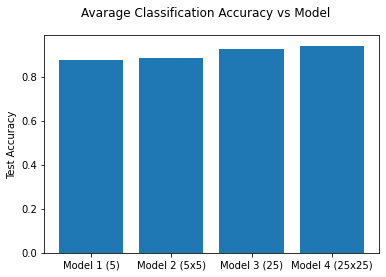

In [26]:
names = ['Model 1 (5)', 'Model 2 (5x5)', 'Model 3 (25)', 'Model 4 (25x25)']
values = [test_acc1, test_acc2, test_acc3, test_acc4]

#plt.subplot(131)
plt.bar(names, values)
plt.suptitle('Avarage Classification Accuracy vs Model')
plt.ylabel('Test Accuracy')
plt.show()